In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
tok_path = "/home/murilo/RelNetCare/data/raw/lora/tokenizer.pkl"
with open(tok_path, "rb") as f:
    tokenizer = pickle.load(f)

print(f"Tokenizer loaded from '{tok_path}'")


/home/murilo/miniconda3/envs/llama-lora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tokenizer loaded from '/home/murilo/RelNetCare/data/raw/lora/tokenizer.pkl'


In [31]:
import pandas as pd

turn_count = 2

if turn_count is None:
    data_path = '/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-train-dev.json'
else:
    data_path = f'/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp{turn_count}/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp{turn_count}-train-dev.json'

df = pd.read_json(data_path, orient='records')

print("JSON list loaded into DataFrame!")

df['prompt'] = df['conversations'].apply(lambda x: x[0].get('value') if x else None)
df['reply'] = df['conversations'].apply(lambda x: x[1].get('value') if x else None)
df['prompt_reply'] = df.apply(lambda row: "A system that extracts entities and their relations from dialogues. It returns results in jsonl format. USER: " + row['prompt'] + " ASSISTANT: " + row['reply'], axis=1)

from tqdm import tqdm
tqdm.pandas()

# Tokenize 'prompt_reply' and get the token count
df['prompt_reply_tokens'] = df['prompt_reply'].progress_apply(lambda x: tokenizer.tokenize(x))
df['token_count'] = df['prompt_reply_tokens'].progress_apply(len)

# Get the character count for comparison
df['char_count'] = df['prompt_reply'].progress_apply(len)
df



JSON list loaded into DataFrame!


100%|██████████| 2350/2350 [00:00<00:00, 866363.22it/s]


,id,conversations,conv_length,prompt,reply,prompt_reply,prompt_reply_tokens,token_count,char_count
0,identity_0_000,"[{'from': 'human', 'value': 'Extract entities ...",949,Extract entities and relations from the dialog...,[],A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",275,1002
1,identity_0_001,"[{'from': 'human', 'value': 'Extract entities ...",881,Extract entities and relations from the dialog...,[],A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",265,934
2,identity_0_002,"[{'from': 'human', 'value': 'Extract entities ...",878,Extract entities and relations from the dialog...,[],A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",264,931
3,identity_0_003,"[{'from': 'human', 'value': 'Extract entities ...",824,Extract entities and relations from the dialog...,[],A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",242,878
4,identity_0_004,"[{'from': 'human', 'value': 'Extract entities ...",871,Extract entities and relations from the dialog...,[],A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",260,923
...,...,...,...,...,...,...,...,...,...
2345,identity_2173_002,"[{'from': 'human', 'value': 'Extract entities ...",1296,Extract entities and relations from the dialog...,"[\n {\n ""subject"": ""Sting"",\n ""subject_type""...",A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",405,1335
2346,identity_2174_003,"[{'from': 'human', 'value': 'Extract entities ...",1164,Extract entities and relations from the dialog...,"[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",375,1199
2347,identity_2174_004,"[{'from': 'human', 'value': 'Extract entities ...",1204,Extract entities and relations from the dialog...,"[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",388,1238
2348,identity_2174_005,"[{'from': 'human', 'value': 'Extract entities ...",1297,Extract entities and relations from the dialog...,"[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",A system that extracts entities and their rela...,"[▁A, ▁system, ▁that, ▁extract, s, ▁entities, ▁...",421,1328


Input + Output Token Count Distribution Token Count Distribution


(0.0, 300.0)

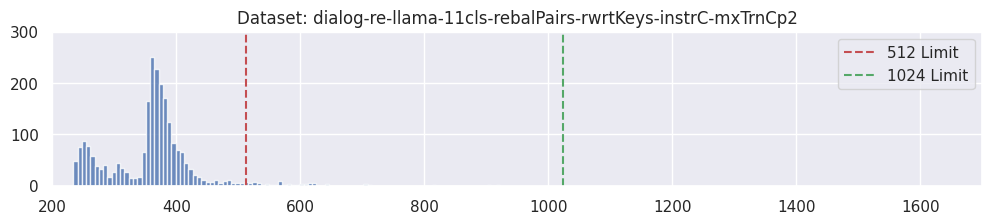

In [32]:
import seaborn as sns
sns.set()
data_stem = data_path.split('/')[-1].replace('-train-dev', '').replace('-test', '').replace('.json', '')
ax = df.token_count.hist(bins=100, figsize=(12, 2), alpha=0.8)

print("Input + Output Token Count Distribution Token Count Distribution")
ax.set_title(f'Dataset: {data_stem}')
ax.axvline(x=512, color='r', linestyle='--', label='512 Limit')
ax.axvline(x=1024, color='g', linestyle='--', label='1024 Limit')

# Add legend to help interpret the lines
ax.legend()
ax.set_xlim([200, 1700])
ax.set_ylim([0, 300])


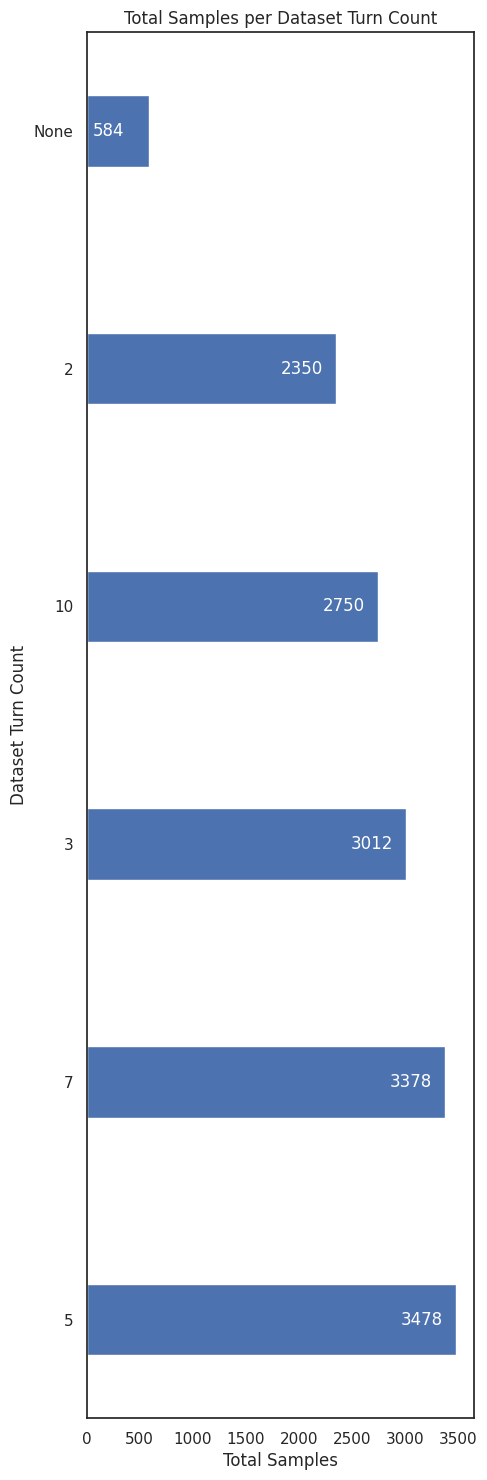

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

sns.set(style="white")

tqdm.pandas()
counts_list = [None, 2, 3, 5, 7, 10]
sample_counts = {}

for turn_count in counts_list:
    if turn_count is None:
        data_path = '/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-train-dev.json'
    else:
        data_path = f'/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp{turn_count}/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp{turn_count}-train-dev.json'
    
    cnt_df = pd.read_json(data_path, orient='records')
    sample_counts[turn_count] = len(cnt_df)

# Sort dictionary by value
sorted_sample_counts = {k: v for k, v in reversed(sorted(sample_counts.items(), key=lambda item: item[1]))}

# Plotting
plt.figure(figsize=(5, 18), facecolor='white')
bars = plt.barh(list(map(str, sorted_sample_counts.keys())), list(sorted_sample_counts.values()), height=0.3)
plt.xlabel('Total Samples')
plt.ylabel('Dataset Turn Count')
plt.title('Total Samples per Dataset Turn Count')

# Adding data labels inside the bar
for bar in bars:
    width = bar.get_width()
    plt.text(width-0.15*max(sample_counts.values()), bar.get_y() + bar.get_height()/2, str(width), va='center', color='white')

plt.show()

